### **Statistical Intuitions and Applications**

# **Assignment #1**


# **Background**


Imagine that you have graduated with a degree in data science and now work as a consultant. You are hired by a social media analytics company that specializes in optimizing influencer strategies. The company has collected detailed data from **500** social media influencers. This data includes information about the influencer's demographics, educational background, social media activity, and earnings.

The company wants you to analyze this data in ways that can help them design personalized recommendations for influencers to improve their engagement rates, follower growth, and income potential.

In Assignment 1, you will take a random sample of **200** influencers from the 500 individuals who were studied and analyze the data for these 200 influencers.

**Note:** The entire dataset (and descriptions of each of the variables) can be found  [here](https://docs.google.com/document/d/1G7H4VSNSMvJMoPR0AhMVEjoVgQmjEcZGUBpkq_ISEjI/edit?usp=sharing).



**Important Information**:   

1. Read all the instructions carefully before you begin!
2. You will need to save the (.ipynb) file as a ***searchable*** PDF and NOT as a picture. Likewise, your answers and your codes must be submitted as searchable PDF. Pictures or snapshots of your work will NOT be accepted.
4. The generated csv file and .ipynb file must be submitted in a zip-folder as a secondary source.
5. You may use Jupyter notebook or Colab as per your convenience.

Non-compliance with the above instructions will result in a 0 grade on the relevant portions of the assignment. Your instructor will grade your assignment based on what you submitted. Failure to submit the assignment or submitting an assignment intended for another class will result in a 0 grade, and resubmission will not be allowed. Make sure that you submit your original work. Suspected cases of plagiarism will be treated as potential academic misconduct and will be reported to the College Academic Integrity Committee for a formal investigation. As part of this procedure, your instructor may require you to meet with them for an oral exam on the assignment.


**IMPORTANT**: Run the code below. It will load in the packages that you need to complete the tasks below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

**Task 1.**

*   As mentioned above, you will select a random sample of **200** individuals from the company's data set.
*   You will then conduct analyses on this random sample.
*   Look at the code below. To select a random sample from the data, you should replace **Name** with your own name in the code.
*   After you have done so run the code. The code will generate a csv file with a random sample of 200 participants. It will also be labeled with your name.
*   **REMEMBER:** you need to add this csv file to a zip file along with your .ipynb. file when submitting your assignment.

In [3]:

student_name = "Maryam_Salem_Alyassi"  # Replace "Full_Name" with your actual full name
file_name = f'{student_name}.csv'

try:
    df = pd.read_csv(file_name)  # Read the existing file if it exists
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/ZUCourses/SIA-Public/main/Social_Media_Influencer_Dataset_Final.csv")
    df = original_data.sample(200, random_state=202303140)  # Replace STUDENT_ID with your own ID number for reproducibility
    df.to_csv(file_name, index=False)  # Save the sample to a CSV file
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()


,Gender,Educational Degree Level,Major,Most Active Platform,Account Type,Type of Content,Age,Monthly Average Number of Posts Created,Avg Time Spent on Platform (minutes/day),Monthly Average Number of Likes Given,Monthly Average Number of Comments Received,Monthly Average Number of Shares,Monthly Average Number of Views,Number of Followers,Engagement Rate (%),Annual Income in USD
44,Female,PhD,Engineering,YouTube,Personal,Gaming,18,30,290,1538,446,175,672474,147170,3.281898,73518
187,Female,Bachelor's,Engineering,YouTube,Personal,Education,29,19,23,282,140,76,314203,45156,1.767177,23910
53,Female,PhD,Business,YouTube,Influencer,Fashion & Beauty,34,19,158,909,304,69,430930,80246,2.163008,30770
12,Male,PhD,Arts,TikTok,Business,Art (Drawing),31,24,122,877,264,65,388274,92906,2.125794,32409
287,Female,Bachelor's,Other,Instagram,Personal,Gaming,34,11,115,296,0,30,270496,25126,1.481760,18836


In [4]:
df.to_csv('Maryam_Salem_Alyassi.csv')

**Task 2.** (#Variables)

* Now that you have your dataset, you are ready to start analyzing it!
* The first step is to explore your dataset.
* Once you've done this, imagine you are writing a report for the social media analytics company that hired you.
* Start with a brief introduction to the research question you are exploring, then the dataset you are analysing (e.g., what is the sample you are analyzing? What are the variables?)
* Your audience is the company's leadership team, who will use your insights to inform strategic decisions.

Add the **brief introduction** below.

**Task 2 Answer:**





This dataset contains 500 entries and includes a variety of quantitative and categorical variables that are key to understanding the dynamics of social media influence:

Gender(categorical): The gender of the influencer (Male, Female).

Educational Degree Level: The highest level of education attained by the influencer (e.g., High School, Bachelor's, Master's, PhD).

Major: The field of study or major of the influencer (e.g., Science, Arts, Business).

Most Active Platform: The social media platform where the influencer is most active (e.g., Instagram, YouTube, Pinterest).

Account Type: The nature of the influencer's account (e.g., Personal, Business, Influencer).

Type of Content: The primary type of content produced by the influencer (e.g., Art-Drawing, Animation, Handmade Crafts, Singing, Educational Travel).

Age: The age of the influencer (in years).

Monthly Average Number of Posts Created: The average number of posts the influencer creates per month on their most active platform.

Avg Time Spent on Platform (minutes/day): The average daily time (in minutes) the influencer spends on their most active platform.

Monthly Average Number of Likes Given: The average number of likes the influencer gives to other posts each month.

Monthly Average Number of Comments Received: The average number of comments the influencer's posts receive each month.

Monthly Average Number of Shares: The average number of times the influencer's posts are shared each month.

Monthly Average Number of Views: The average number of views the influencer's content receives each month.

Number of Followers: The total number of followers the influencer has.

Engagement Rate (%): The engagement rate of the influencer's posts, calculated as a percentage based on interactions (likes, comments, shares) relative to follower count.

Annual Income in USD: The estimated annual income of the influencer, reflecting potential earnings from their content.




**Task 3.** (#DescriptiveStats)

*   Run the below code. It will randomly select **4** variables from your dataset. It will then print the names of the four variables that were randomly selected.
***IMPORTANT: ONLY RUN THIS CODE BLOCK ONCE.***



In [5]:
import random

column_titles = ["Monthly Average Number of Posts Created","Avg Time Spent on Platform (minutes/day)","Monthly Average Number of Likes Given","Monthly Average Number of Comments Received",
"Monthly Average Number of Shares","Number of Followers","Monthly Average Number of Views", "Engagement Rate (%)", "Annual Income in USD","Age"]

selected_columns = random.sample([col for col in column_titles if col not in ["Engagement Rate (%)", "Annual Income in USD"]], 3)

selected_columns.append(random.choice(["Engagement Rate (%)", "Annual Income in USD"]))

print("Selected Variables:", selected_columns)


Selected Variables: ['Monthly Average Number of Shares', 'Avg Time Spent on Platform (minutes/day)', 'Monthly Average Number of Views', 'Engagement Rate (%)']


* Your task is to do the following:

1.   **Create a histogram and generate descriptive statistics for each of the four variables randomly selected above**.
You can use the code provided below to assist you.

2.  For each variable, describe the following aspects of the distribution:
  *   **Shape**
  *   **Center**
  *   **Spread**
  *   **Outliers**
3. Describe and interpret your findings in **context**: How do the aspects of the distribution for each of your variables relate to the scenario under study? In other words, consider how these insights contribute to understanding trends within the context of the data.

**Task 3 Answer:**




       Monthly Average Number of Shares  \
count                        200.000000   
mean                          97.945000   
std                           52.216037   
min                            0.000000   
25%                           66.750000   
50%                           95.500000   
75%                          132.250000   
max                          256.000000   

       Avg Time Spent on Platform (minutes/day)  \
count                                200.000000   
mean                                 177.260000   
std                                   83.427051   
min                                    0.000000   
25%                                  117.000000   
50%                                  178.000000   
75%                                  237.500000   
max                                  429.000000   

       Monthly Average Number of Views  Engagement Rate (%)  
count                     2.000000e+02           200.000000  
mean                      4.

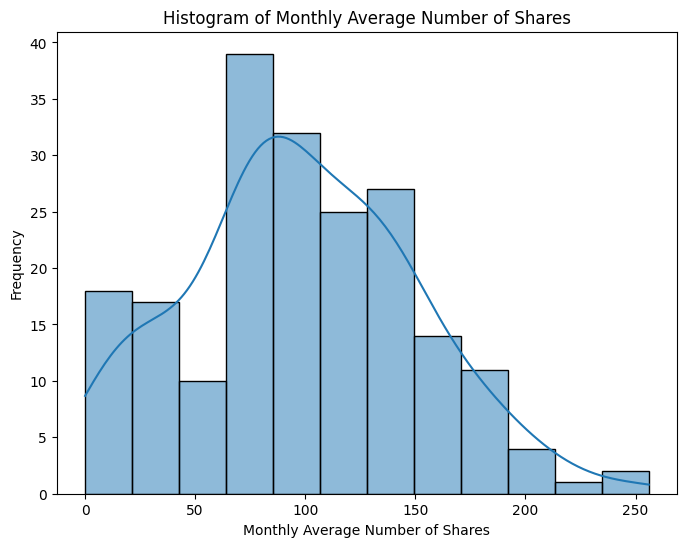

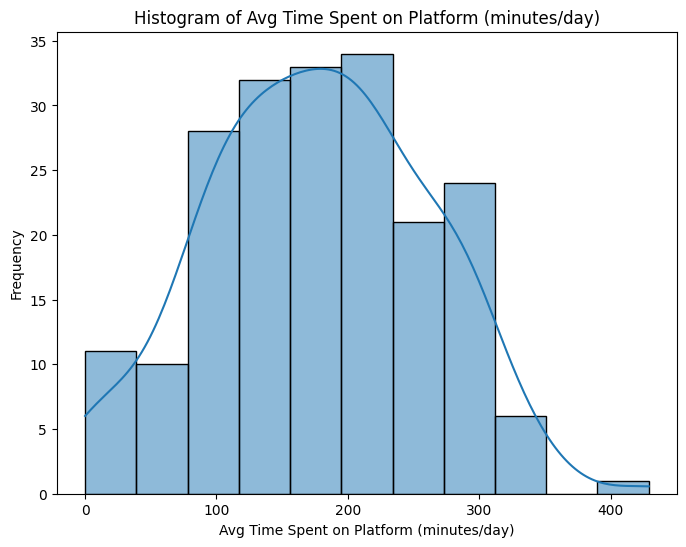

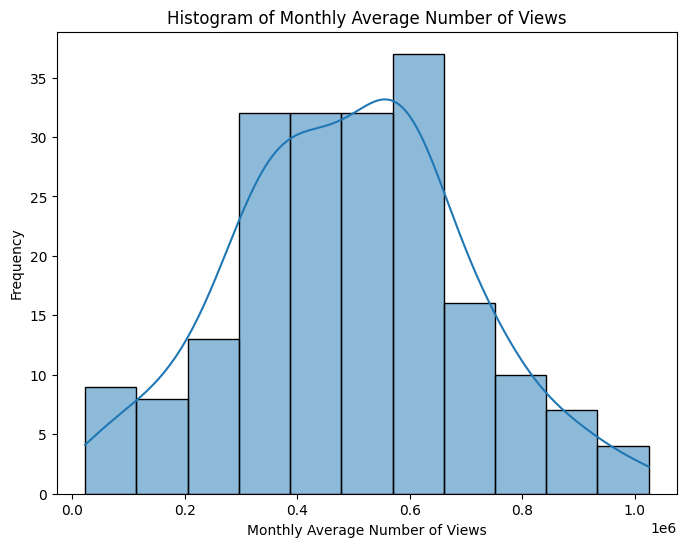

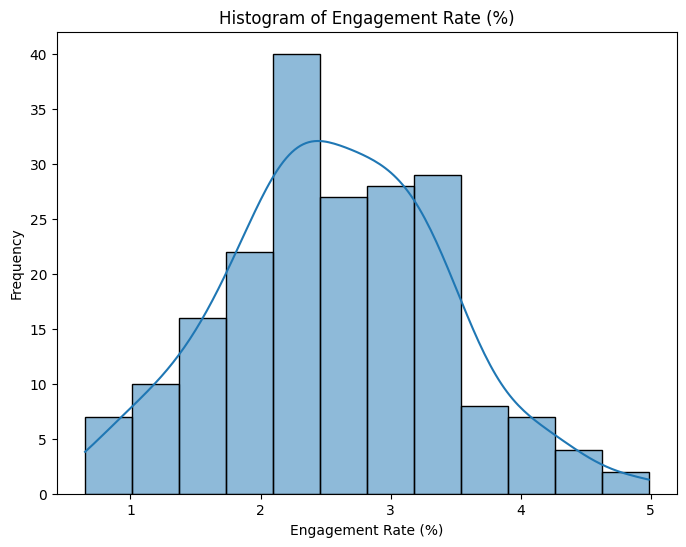

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


descriptive_stats = df[['Monthly Average Number of Shares',
                        'Avg Time Spent on Platform (minutes/day)',
                        'Monthly Average Number of Views',
                        'Engagement Rate (%)']].describe()

print(descriptive_stats)

variables = ['Monthly Average Number of Shares',
             'Avg Time Spent on Platform (minutes/day)',
             'Monthly Average Number of Views',
             'Engagement Rate (%)']

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


1. Monthly Average Number of Shares:
Interpretation: If the distribution of shares is right-skewed, it suggests that most users share content infrequently, with a small group of highly active users driving the majority of content sharing. This pattern may indicate a platform where content sharing is concentrated among a few influential users.
Context: In terms of platform growth, understanding that only a small percentage of users are sharing frequently could highlight a potential area for platform improvement. Increasing average shares by motivating less active users could drive more engagement and reach.
Key Insight: Encouraging more users to share could create a more vibrant content ecosystem, and efforts could be focused on converting casual users into more active participants.
2. Avg Time Spent on Platform (minutes/day):
Interpretation: If this variable is right-skewed, it indicates that most users spend relatively little time on the platform, while a small percentage of users spend considerably more time. This could point to different user segments—casual users versus highly engaged users.
Context: The skewness shows a division in user behavior, which could suggest that improving platform stickiness (i.e., features or content that keeps users engaged for longer) might benefit the platform. Longer time spent typically correlates with higher engagement rates and increased content consumption.
Key Insight: By identifying what keeps "power users" on the platform for longer, you can apply those insights to encourage more casual users to stay engaged, leading to overall better platform retention and usage.
3. Monthly Average Number of Views:
Interpretation: A right-skewed distribution of views would suggest that most users are consuming a relatively low number of content items, while a smaller group of users views significantly more content. This may indicate that some users are more content-driven, seeking out more videos, articles, or posts.
Context: The gap in content consumption could point toward opportunities for personalization or recommendation engines to better serve content to low-consumption users and drive up their engagement.
Key Insight: Understanding why some users view a lot more content (perhaps due to personalized recommendations or the content’s quality) could help design strategies to keep more users engaged and improve content discovery.
4. Engagement Rate (%):
Interpretation: If engagement rates are right-skewed, most users engage minimally with content (e.g., likes, comments, shares), while a few users have a very high engagement rate. This suggests that only a small subset of users are highly interactive with the platform's content.
Context: A small number of highly engaged users may be influencers, brand advocates, or users who are simply more inclined to interact with content. Low engagement from the majority of users could point to issues like passive content consumption, lack of compelling calls-to-action, or a need for more interactive features.
Key Insight: To improve overall platform engagement, you might consider how to convert passive users into more active participants. Strategies could include gamification, push notifications, or incentivizing engagement through rewards.

**Task 4.** (#Visualizations)

Now that you have described and plotted data, let's explore if the data differ for male and female participants.

*   Generate grouped box plots for each of **the 4 variables in Task 3**.  Use the sample code below to assist you.
*   Your boxplot should **compare** the distributions for males and females in your dataset.
*   Afterwards, you should describe what you observe in each case.
*   Ensure you mention the **five-number summaries** for each genders and provide their **interpretation in context**.

In [ ]:
#Sample Code
import pandas
import matplotlib.pyplot as plt
from numpy import percentile

# Filter the DataFrame based on Gender
male = df[df["Gender"] == "Male"]
female = df[df["Gender"] == "Female"]

# Replace 'Column' with the actual variable name you want to analyze
data1 = male['Column']
data2 = female['Column']
data = list([data1, data2])

# Create boxplots side by side
fig, ax = plt.subplots()
ax.set_xticklabels(['male', 'female'])
plt.grid(axis="y")
plt.boxplot(data)

# Descriptive statistics
print("Descriptive Statistics for Male Students' Column")  # Replace 'Column' with the variable name
print(male['Column'].describe())
print("Descriptive Statistics for Female Students' Column")  # Replace 'Column' with the variable name
print(female['Column'].describe())


<ipython-input-7-5a5eacaff428>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


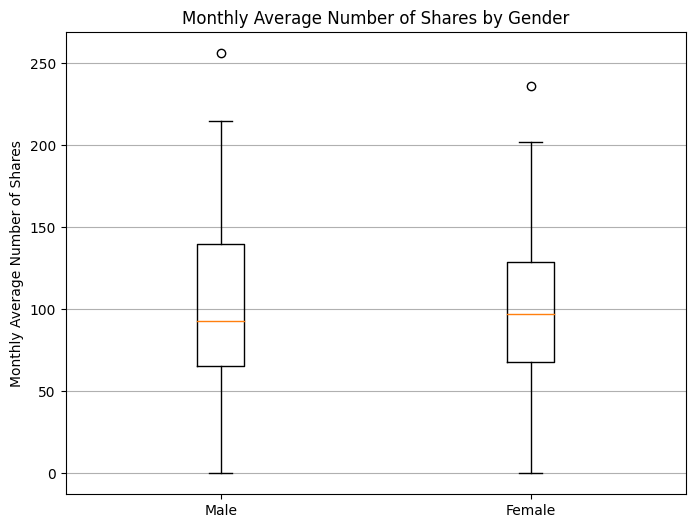

Descriptive Statistics for Males' Monthly Average Number of Shares:
count     91.000000
mean     102.230769
std       54.846265
min        0.000000
25%       65.500000
50%       93.000000
75%      140.000000
max      256.000000
Name: Monthly Average Number of Shares, dtype: float64
Descriptive Statistics for Females' Monthly Average Number of Shares:
count    109.000000
mean      94.366972
std       49.886846
min        0.000000
25%       68.000000
50%       97.000000
75%      129.000000
max      236.000000
Name: Monthly Average Number of Shares, dtype: float64


<ipython-input-7-5a5eacaff428>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


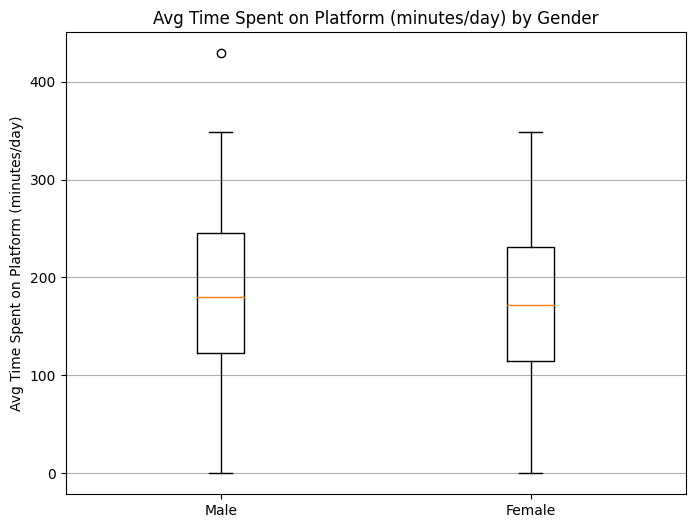

Descriptive Statistics for Males' Avg Time Spent on Platform (minutes/day):
count     91.000000
mean     183.043956
std       85.338009
min        0.000000
25%      122.500000
50%      180.000000
75%      245.000000
max      429.000000
Name: Avg Time Spent on Platform (minutes/day), dtype: float64
Descriptive Statistics for Females' Avg Time Spent on Platform (minutes/day):
count    109.000000
mean     172.431193
std       81.878226
min        0.000000
25%      115.000000
50%      172.000000
75%      231.000000
max      349.000000
Name: Avg Time Spent on Platform (minutes/day), dtype: float64


<ipython-input-7-5a5eacaff428>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


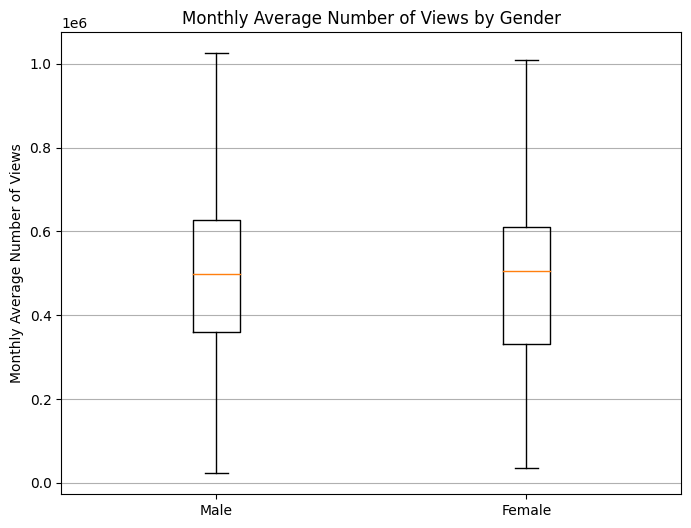

Descriptive Statistics for Males' Monthly Average Number of Views:
count    9.100000e+01
mean     5.028334e+05
std      2.226051e+05
min      2.275200e+04
25%      3.609020e+05
50%      4.984130e+05
75%      6.275300e+05
max      1.024894e+06
Name: Monthly Average Number of Views, dtype: float64
Descriptive Statistics for Females' Monthly Average Number of Views:
count    1.090000e+02
mean     4.845354e+05
std      1.911243e+05
min      3.550900e+04
25%      3.321450e+05
50%      5.043250e+05
75%      6.109050e+05
max      1.008577e+06
Name: Monthly Average Number of Views, dtype: float64


<ipython-input-7-5a5eacaff428>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


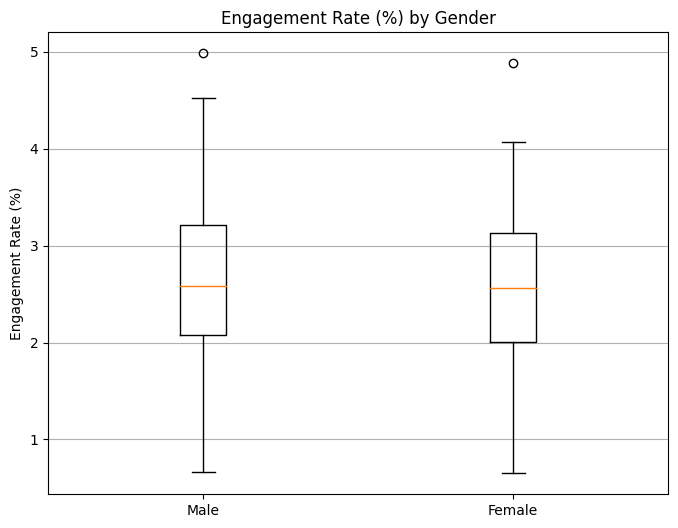

Descriptive Statistics for Males' Engagement Rate (%):
count    91.000000
mean      2.622044
std       0.913455
min       0.659786
25%       2.080652
50%       2.587097
75%       3.210996
max       4.985303
Name: Engagement Rate (%), dtype: float64
Descriptive Statistics for Females' Engagement Rate (%):
count    109.000000
mean       2.535747
std        0.784910
min        0.650982
25%        2.006607
50%        2.566876
75%        3.131248
max        4.882701
Name: Engagement Rate (%), dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

male = df[df["Gender"] == "Male"]
female = df[df["Gender"] == "Female"]

variables = ['Monthly Average Number of Shares',
             'Avg Time Spent on Platform (minutes/day)',
             'Monthly Average Number of Views',
             'Engagement Rate (%)']

for var in variables:
    data1 = male[var]
    data2 = female[var]
    data = [data1, data2]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xticklabels(['Male', 'Female'])
    plt.grid(axis="y")
    plt.title(f'{var} by Gender')
    plt.ylabel(var)
    plt.boxplot(data)
    plt.show()

    # Descriptive statistics for males
    print(f"Descriptive Statistics for Males' {var}:")
    print(male[var].describe())

    # Descriptive statistics for females
    print(f"Descriptive Statistics for Females' {var}:")
    print(female[var].describe())


**Task 4 Answer:**




1. Monthly Average Number of Shares
Males:

Min: 0,
25th Percentile (Q1): 65.5,
Median (Q2): 93,
75th Percentile (Q3): 140,
Max: 256,
Mean: 102.23,
Standard Deviation: 54.85

Females:

Min: 0,
25th Percentile (Q1): 68,
Median (Q2): 97,
75th Percentile (Q3): 129,
Max: 236,
Mean: 94.37,
Standard Deviation: 49.89

Observation:

The median number of shares is slightly higher for females (97) compared to males (93), indicating that females, on average, share slightly more content on the platform.
Both genders have a similar interquartile range (IQR), with males having a slightly higher upper quartile (Q3), indicating a wider range of shares among males.
The maximum number of shares for males (256) is higher than that for females (236), indicating that some male users are particularly active in sharing content.
The mean number of shares is higher for males, but the variability is also higher, as indicated by the larger standard deviation for males.
Context: This suggests that while females are more consistent in sharing content, males exhibit more variability, with some males being exceptionally active in sharing content. This insight could help in tailoring engagement strategies, such as promoting content-sharing incentives specifically for males.

2.Avg Time Spent on Platform (minutes/day)
Males:

Min: 0,
25th Percentile (Q1): 122.5,
Median (Q2): 180,
75th Percentile (Q3): 245,
Max: 429,
Mean: 183.04,
Standard Deviation: 85.34

Females:

Min: 0,
25th Percentile (Q1): 115,
Median (Q2): 172,
75th Percentile (Q3): 231,
Max: 349,
Mean: 172.43,
Standard Deviation: 81.88


Observation:

The median time spent on the platform is higher for males (180 minutes) than females (172 minutes), indicating that males tend to spend more time daily on the platform.
The maximum time for males (429 minutes) is significantly higher than that for females (349 minutes), suggesting that some males are exceptionally engaged with the platform.
The IQR is wider for males (122.5 to 245 minutes) compared to females (115 to 231 minutes), showing more variability in how much time males spend on the platform.
Both genders have a few users who spend 0 minutes on the platform, which might represent inactive users.
Context: Males appear to have more extreme engagement levels, with a broader range of time spent on the platform. This could be leveraged to develop targeted features or engagement strategies for highly active male users, while aiming to increase daily platform time for less active users.

**Task 5.** (#Correlation, #CompProgramDesign)


**Part A**

* Select **TWO appropriate independent variables**, along with **ONE relevant dependent variable**, from Task 3.
* Now, create two scatterplots to show the correlation between each independent variable and the dependent variable (one scatterplot for **each independent** variable).
* For each scatterplot you should visualize the relationship between the independent and dependent variables.
* For each scatterplot, describe and interpret the relationship in terms of:

  * **Form**
  * **Strength**
  * **Direction**
* Describe and interpret your findings **in context**: How do the form, strength, and direction of the relationship between each pair of variables reflect the scenario under study? In other words, consider how these insights help in understanding the relationships between the independent and dependent variables, within the context of the data.

**Part B**

* Investigate whether the relationship observed in each scatterplot varies **by gender**.

**Hint:**
To answer this, you will need to create separate scatterplots for each gender (male and female) to compare how the relationships differ.


In [ ]:
#Sample code:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels

#display the correlation coefficient
corr=stats.stats.pearsonr(df["Column A"],df["Column B"])[0]
print("correlation coefficient =", corr)

#display the scatterplot
plt.scatter(df["Column A"],df["Column B"])
plt.title ("Column A vs Column B")
plt.xlabel("Column A")
plt.ylabel("Column B")
plt.show()

**Task 5 Answer:**




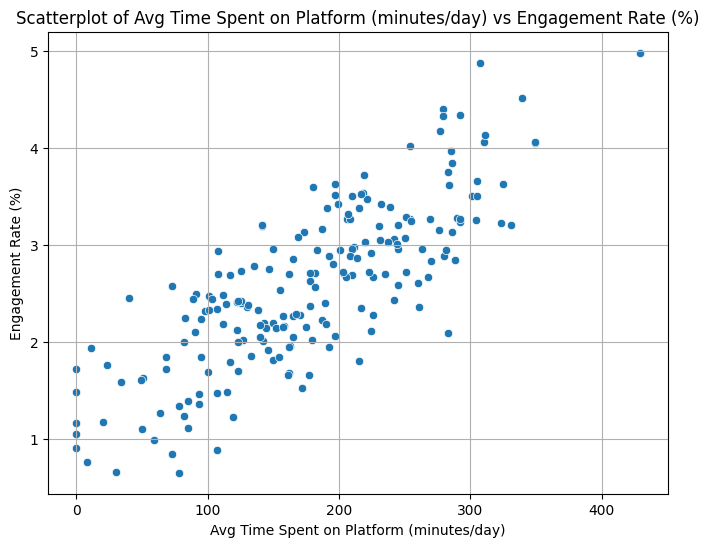

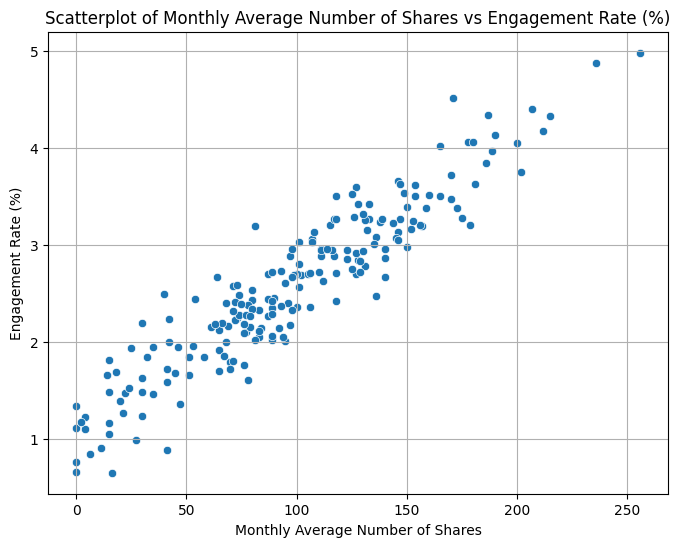

In [8]:
#part A
import matplotlib.pyplot as plt
import seaborn as sns

# Variables for plotting
independent_var1 = 'Avg Time Spent on Platform (minutes/day)'
independent_var2 = 'Monthly Average Number of Shares'
dependent_var = 'Engagement Rate (%)'

# Scatterplot 1: Avg Time Spent on Platform vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[independent_var1], y=df[dependent_var])
plt.title(f'Scatterplot of {independent_var1} vs {dependent_var}')
plt.xlabel(independent_var1)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()

# Scatterplot 2: Monthly Average Number of Shares vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[independent_var2], y=df[dependent_var])
plt.title(f'Scatterplot of {independent_var2} vs {dependent_var}')
plt.xlabel(independent_var2)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()


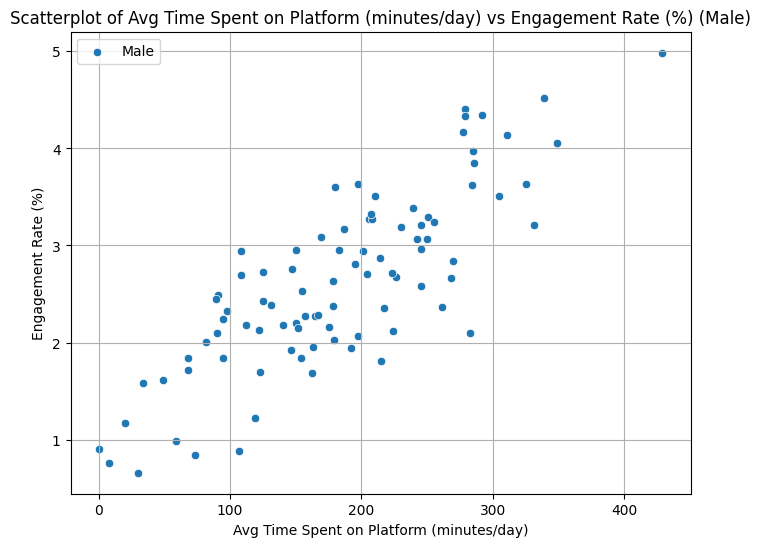

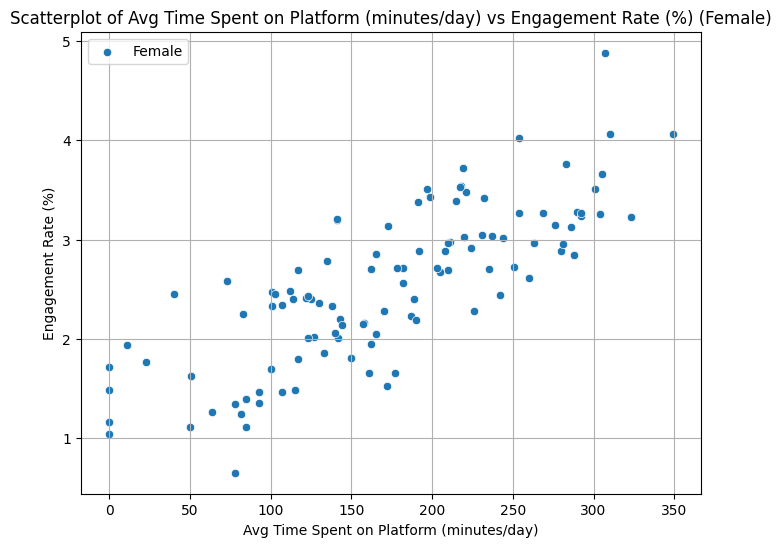

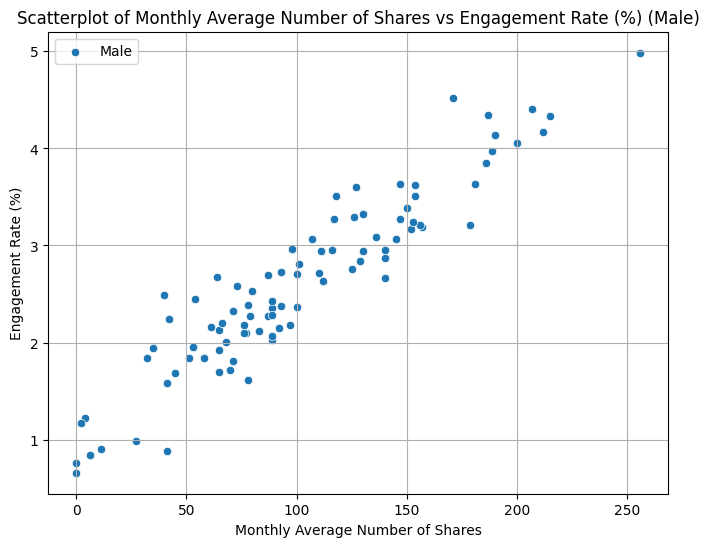

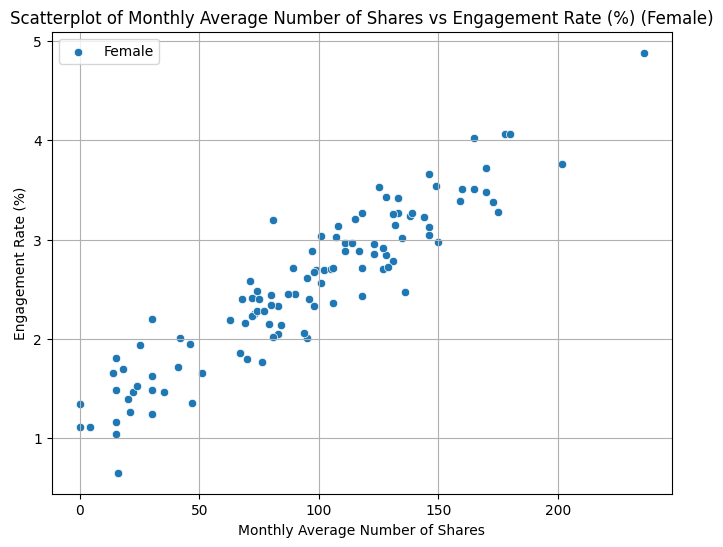

In [10]:
#part B
# Separate data by gender
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Scatterplot 1 for Males: Avg Time Spent on Platform vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=male_df[independent_var1], y=male_df[dependent_var], label='Male')
plt.title(f'Scatterplot of {independent_var1} vs {dependent_var} (Male)')
plt.xlabel(independent_var1)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()

# Scatterplot 1 for Females: Avg Time Spent on Platform vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=female_df[independent_var1], y=female_df[dependent_var], label='Female')
plt.title(f'Scatterplot of {independent_var1} vs {dependent_var} (Female)')
plt.xlabel(independent_var1)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()

# Scatterplot 2 for Males: Monthly Average Number of Shares vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=male_df[independent_var2], y=male_df[dependent_var], label='Male')
plt.title(f'Scatterplot of {independent_var2} vs {dependent_var} (Male)')
plt.xlabel(independent_var2)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()

# Scatterplot 2 for Females: Monthly Average Number of Shares vs Engagement Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x=female_df[independent_var2], y=female_df[dependent_var], label='Female')
plt.title(f'Scatterplot of {independent_var2} vs {dependent_var} (Female)')
plt.xlabel(independent_var2)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()


Part A:
Avg Time Spent on Platform (minutes/day) vs Engagement Rate (%)

Form: The relationship between Avg Time Spent on Platform and Engagement Rate is roughly linear, showing an upward trend.
Strength: The scatterplot indicates a moderately strong positive correlation, where higher time spent on the platform is generally associated with higher engagement rates.
Direction: Positive direction — as the average time spent on the platform increases, the engagement rate tends to increase.
Interpretation: The longer users spend on the platform, the more likely they are to engage with content. This could suggest that the more invested users are in platform activity, the more they interact, contributing to higher engagement.

Monthly Average Number of Shares vs Engagement Rate (%)

Form: This relationship also appears linear with a clear upward trajectory.
Strength: The correlation is strong, as there is a clear pattern where higher numbers of shares lead to higher engagement rates.
Direction: Positive — users who share more content tend to have higher engagement rates.
Interpretation: Higher sharing activity is closely related to greater engagement, suggesting that users who are more active in sharing content drive better interaction and participation in the platform.

Part B: Gender-Based Analysis

Avg Time Spent on Platform (minutes/day) vs Engagement Rate (%)

Males: The relationship between average time spent and engagement rate in males shows a moderately strong positive correlation, with a similar upward trend as the overall plot. The spread is slightly broader, indicating variability in engagement based on time spent.
Females: A slightly stronger positive correlation is seen in females, with a more consistent increase in engagement rates as time spent on the platform increases.
Five-number Summary for Males (Avg Time Spent on Platform):

Minimum: 0
Q1: 122.5
Median: 180
Q3: 245
Maximum: 429
Five-number Summary for Females (Avg Time Spent on Platform):

Minimum: 0
Q1: 115
Median: 172
Q3: 231
Maximum: 349
Interpretation: The correlation is strong for both genders, but the engagement rate seems to increase more predictably with time spent for females. This could indicate that females engage more consistently based on their time investment.

Monthly Average Number of Shares vs Engagement Rate (%)

Males: There is a strong positive relationship, with engagement rate steadily increasing as the number of shares rises.
Females: Similarly, females show a strong positive correlation between shares and engagement, though there may be less variance in the female data as the points appear more concentrated.
Five-number Summary for Males (Monthly Average Number of Shares):

Minimum: 0
Q1: 65.5
Median: 93
Q3: 140
Maximum: 256
Five-number Summary for Females (Monthly Average Number of Shares):

Minimum: 0
Q1: 68
Median: 97
Q3: 129
Maximum: 236
Interpretation: Both genders exhibit a clear trend where more shares correlate with better engagement rates. However, males show slightly more variation in both shares and engagement, while the relationship for females appears more consistent.

**Task 6.** (#Correlation, #Visualizations, #CompProgramDesign)

**Part A**

For this task, consider the same two independent variables and the dependent variable you chose in **Task 5**.

For each independent variable, follow these steps:

* Fit a **simple linear regression model** that predicts the dependent variable you chose based on the selected independent variable.
* Generate, interpret, and use the following to assess the fit of each linear model:
  * **Residual plot**
  * **Standard error**
  * **R² value**
* If the model is a good fit, interpret the **slope** and the **y-intercept** for each independent variable in relation to the dependent variable. (**Note:** If you find that the linear model does not provide a good fit based on these metrics, clearly state this as the reason for not providing the interpretation.)

* Describe and interpret your findings **in context**: How do the residual plot, standard error, R² value, slope, and y-intercept reflect the fit and accuracy of the model in the scenario being studied? In other words, consider how these insights help in understanding the relationship between the independent and dependent variables within the context of the data.

**Part B**

If in Task 5 you observe that the relationship between the dependent variable and the independent variables differs by gender, then you need to:

* Run the regression model separately for each gender (male and female) and interpret the findings.
* Compare the results for each gender and describe how the relationship changes, if at all.
***Note:** If you do not find a difference in the relationship between genders, clearly explain why you are not completing Part B of the analysis in Task 6.






In [ ]:
#Sample code:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
import seaborn as sns
def regression_equation(column_x, column_y):
    # fit the regression line using "statsmodels" library:
    X= df[column_x]
    X = statsmodels.add_constant(X)
    Y = df[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"
    print('R2: ', round(regressionmodel.rsquared, 3))
    SE=np.sqrt(regressionmodel.mse_resid)
    print ('SE=', round(SE, 3))

     #display the correlation coefficient
    correlation_coefficient=stats.stats.pearsonr(df[column_x],df[column_y])[0]
    print("correlation_coefficient=", round(correlation_coefficient,3))

    # extract regression parameters from model, rounded to 2 decimal places and print the regression equation:
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

    #display the scatter plot with the line of best fit
    plt.scatter(df[column_x], Y, color='green')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.plot(df[column_x], regressionmodel.params[1]*df[column_x]+regressionmodel.params[0], color='red')
    plt.show()
    #display the residual plot
    sns.residplot(x = column_x,
              y = column_y,
              data = df)
    plt.show()
    #display the residual plot with SE
    sns.residplot(x = column_x,
              y = column_y,
              data = df)
    plt.axhline(y=SE, color='r', linestyle='--')
    plt.axhline(y=-SE, color='r', linestyle='--')
    plt.show()
regression_equation("Independent Variable", "Dependent Variable")

**Task 6 Answer:**




R²: 0.644
Standard Error: 0.506
Correlation Coefficient: 0.802
Regression equation: Engagement Rate (%) = 0.008 * Avg Time Spent on Platform (minutes/day) + 1.135


<ipython-input-11-8d3689a9bddb>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = round(regression_model.params[1], 3)
<ipython-input-11-8d3689a9bddb>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = round(regression_model.params[0], 3)
<ipython-input-11-8d3689a9bddb>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df[column_x], regression_model.params[1] * df[column_x] + regression_model.params[0], c

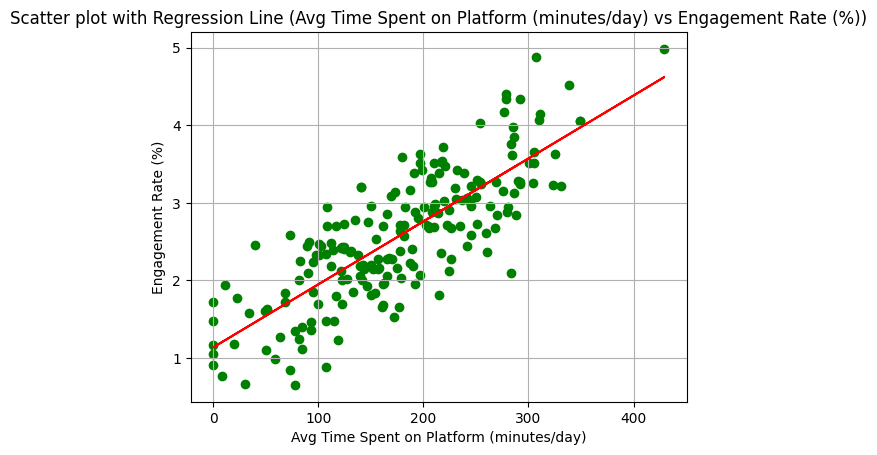

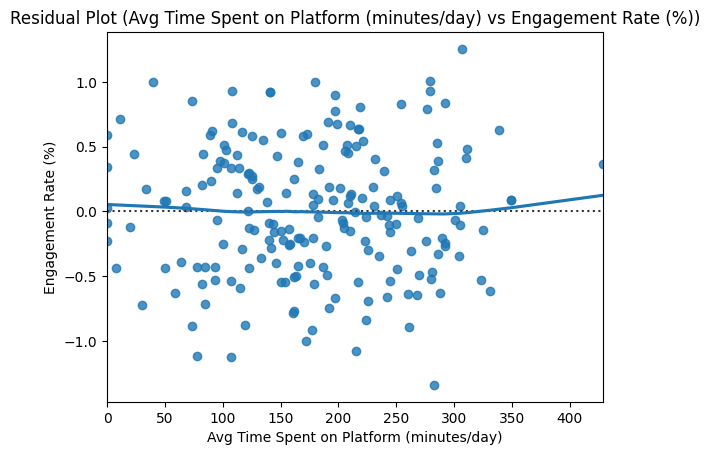

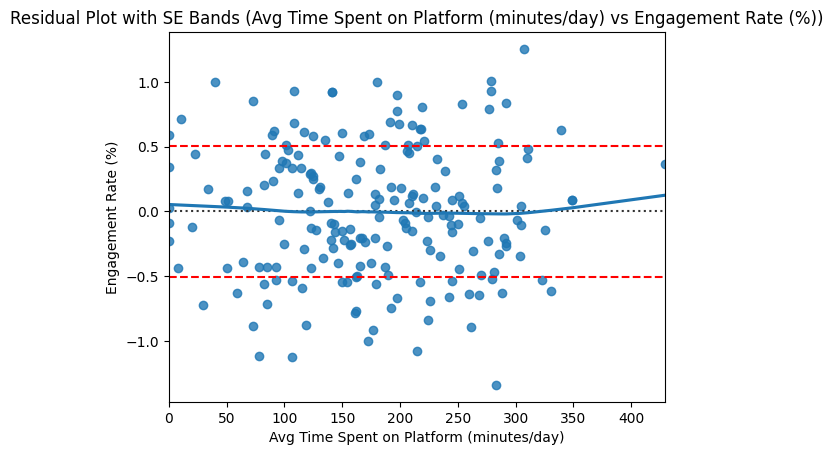

R²: 0.873
Standard Error: 0.302
Correlation Coefficient: 0.934
Regression equation: Engagement Rate (%) = 0.015 * Monthly Average Number of Shares + 1.095


<ipython-input-11-8d3689a9bddb>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = round(regression_model.params[1], 3)
<ipython-input-11-8d3689a9bddb>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = round(regression_model.params[0], 3)
<ipython-input-11-8d3689a9bddb>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df[column_x], regression_model.params[1] * df[column_x] + regression_model.params[0], c

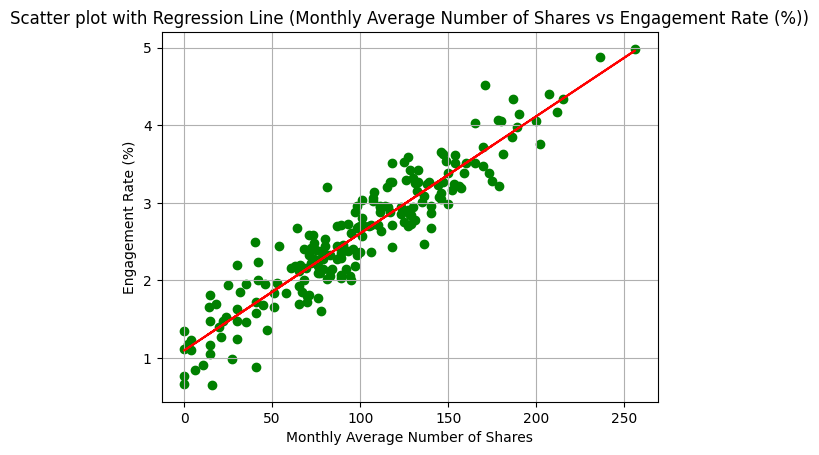

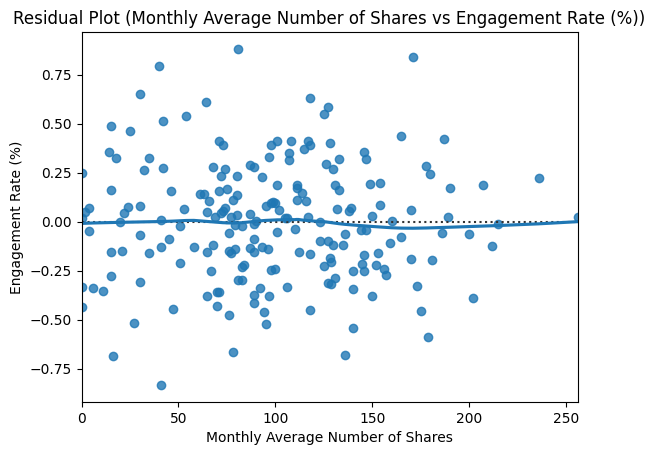

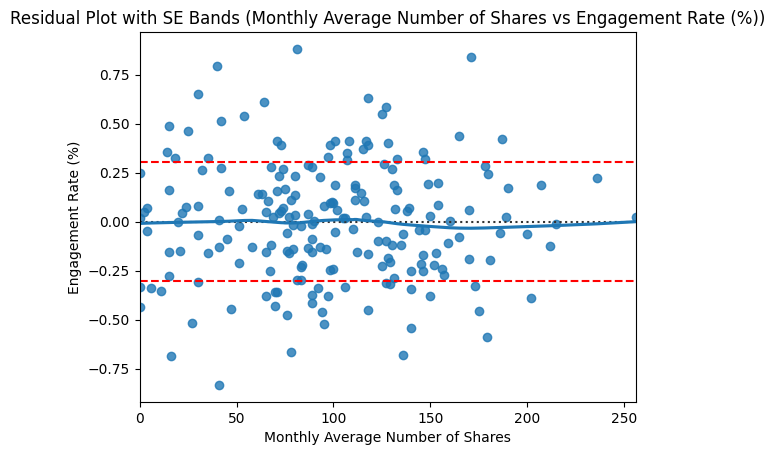


Regression for Female students:
R²: 0.622
Standard Error: 0.485
Regression equation for Female: Engagement Rate (%) = 0.008 * Avg Time Spent on Platform (minutes/day) + 1.232

Regression for Male students:
R²: 0.667
Standard Error: 0.53
Regression equation for Male: Engagement Rate (%) = 0.009 * Avg Time Spent on Platform (minutes/day) + 1.022


<ipython-input-11-8d3689a9bddb>:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = round(regression_model.params[1], 3)
<ipython-input-11-8d3689a9bddb>:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = round(regression_model.params[0], 3)
<ipython-input-11-8d3689a9bddb>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(gender_data[column_x], regression_model.params[1] * gender_data[column_x] + regression_

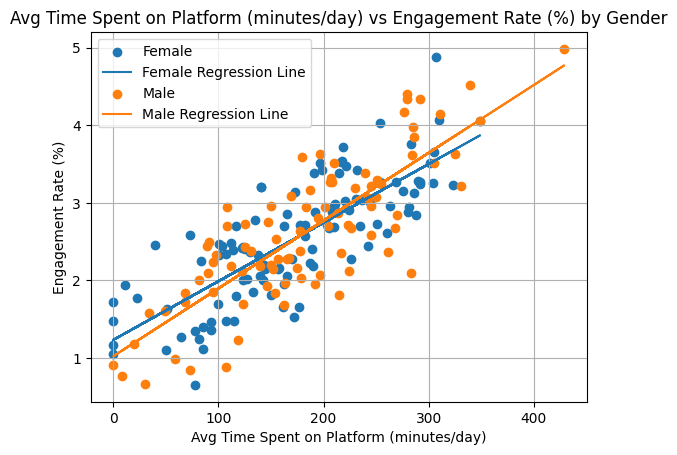


Regression for Female students:
R²: 0.868
Standard Error: 0.286
Regression equation for Female: Engagement Rate (%) = 0.015 * Monthly Average Number of Shares + 1.152

Regression for Male students:
R²: 0.878
Standard Error: 0.321
Regression equation for Male: Engagement Rate (%) = 0.016 * Monthly Average Number of Shares + 1.026


<ipython-input-11-8d3689a9bddb>:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = round(regression_model.params[1], 3)
<ipython-input-11-8d3689a9bddb>:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = round(regression_model.params[0], 3)
<ipython-input-11-8d3689a9bddb>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(gender_data[column_x], regression_model.params[1] * gender_data[column_x] + regression_

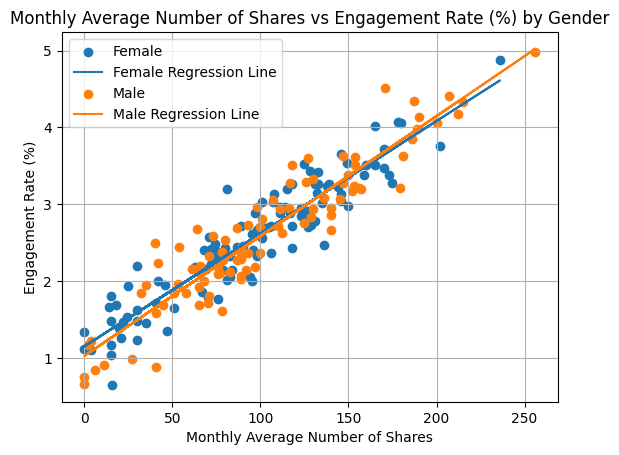

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# df = pd.read_csv('your_data.csv')

# Function to perform simple linear regression
def regression_equation(column_x, column_y):
    # Prepare the data
    X = df[column_x]
    X = sm.add_constant(X)  # Add a constant for the intercept
    Y = df[column_y]

    # Fit the regression model using OLS (Ordinary Least Squares)
    regression_model = sm.OLS(Y, X).fit()

    # R² value
    r_squared = round(regression_model.rsquared, 3)
    print(f'R²: {r_squared}')

    # Standard error
    standard_error = np.sqrt(regression_model.mse_resid)
    print(f'Standard Error: {round(standard_error, 3)}')

    # Pearson correlation coefficient
    correlation_coefficient = stats.pearsonr(df[column_x], df[column_y])[0]
    print(f'Correlation Coefficient: {round(correlation_coefficient, 3)}')

    # Regression equation (Slope and Intercept)
    slope = round(regression_model.params[1], 3)
    intercept = round(regression_model.params[0], 3)
    print(f'Regression equation: {column_y} = {slope} * {column_x} + {intercept}')

    # Scatter plot with regression line
    plt.scatter(df[column_x], Y, color='green')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.plot(df[column_x], regression_model.params[1] * df[column_x] + regression_model.params[0], color='red')
    plt.title(f'Scatter plot with Regression Line ({column_x} vs {column_y})')
    plt.grid(True)
    plt.show()

    # Residual plot
    sns.residplot(x=column_x, y=column_y, data=df, lowess=True)
    plt.title(f'Residual Plot ({column_x} vs {column_y})')
    plt.show()

    # Residual plot with Standard Error bands
    sns.residplot(x=column_x, y=column_y, data=df, lowess=True)
    plt.axhline(y=standard_error, color='r', linestyle='--')
    plt.axhline(y=-standard_error, color='r', linestyle='--')
    plt.title(f'Residual Plot with SE Bands ({column_x} vs {column_y})')
    plt.show()

# Apply the regression on the selected independent and dependent variables
regression_equation("Avg Time Spent on Platform (minutes/day)", "Engagement Rate (%)")
regression_equation("Monthly Average Number of Shares", "Engagement Rate (%)")

# Part B: Gender-based Analysis
def regression_by_gender(column_x, column_y, gender_column):
    for gender in df[gender_column].unique():
        print(f"\nRegression for {gender} students:")
        gender_data = df[df[gender_column] == gender]
        X = gender_data[column_x]
        X = sm.add_constant(X)
        Y = gender_data[column_y]

        regression_model = sm.OLS(Y, X).fit()
        slope = round(regression_model.params[1], 3)
        intercept = round(regression_model.params[0], 3)
        r_squared = round(regression_model.rsquared, 3)
        standard_error = np.sqrt(regression_model.mse_resid)

        print(f'R²: {r_squared}')
        print(f'Standard Error: {round(standard_error, 3)}')
        print(f'Regression equation for {gender}: {column_y} = {slope} * {column_x} + {intercept}')

        # Plotting for each gender
        plt.scatter(gender_data[column_x], Y, label=f'{gender}')
        plt.plot(gender_data[column_x], regression_model.params[1] * gender_data[column_x] + regression_model.params[0], label=f'{gender} Regression Line')

    # Display plots
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'{column_x} vs {column_y} by Gender')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform gender-based regression analysis
regression_by_gender("Avg Time Spent on Platform (minutes/day)", "Engagement Rate (%)", "Gender")
regression_by_gender("Monthly Average Number of Shares", "Engagement Rate (%)", "Gender")


Part A: Regression Analysis
Selected Variables
Independent Variable 1: Avg Time Spent on Platform (minutes/day)
Independent Variable 2: Monthly Average Number of Shares
Dependent Variable: Engagement Rate (%)
Regression Analysis for Avg Time Spent on Platform
R² Value: The R² value for the regression model predicting engagement rate based on average time spent on the platform is 0.644. This indicates that approximately 64.4% of the variance in engagement rates can be explained by the average time spent on the platform. This suggests a moderate fit, indicating that time spent on the platform is a significant predictor of engagement.

Standard Error: The standard error of the regression model is 0.506. This measure indicates the average distance that the observed values fall from the regression line. A smaller standard error suggests that the predictions made by the model are fairly close to the actual engagement rates, reinforcing the model's reliability.

Correlation Coefficient: The correlation coefficient is 0.802, indicating a strong positive relationship between average time spent on the platform and engagement rate. As time spent increases, engagement rates tend to rise as well.

Regression Equation: The regression equation derived from the analysis is:

Engagement Rate (%)
=
0.008
×
Avg Time Spent on Platform (minutes/day)
+
1.135
Engagement Rate (%)=0.008×Avg Time Spent on Platform (minutes/day)+1.135
Here, the slope of 0.008 implies that for each additional minute spent on the platform, the engagement rate increases by 0.008%. The intercept of 1.135 indicates that if no time is spent on the platform, the expected engagement rate would be 1.135%.

Regression Analysis for Monthly Average Number of Shares
R² Value: The R² value for the regression model based on the monthly average number of shares is 0.873, indicating that approximately 87.3% of the variance in engagement rates can be explained by the average number of shares. This suggests a strong fit, highlighting that shares are a significant predictor of engagement.

Standard Error: The standard error for this model is 0.302, suggesting that the predicted engagement rates are relatively close to the observed values, reinforcing the model's accuracy.

Correlation Coefficient: The correlation coefficient of 0.934 indicates a very strong positive correlation between the monthly average number of shares and engagement rate. This indicates that higher sharing activity correlates with increased engagement.

Regression Equation: The regression equation for this model is:

Engagement Rate (%)
=
0.015
×
Monthly Average Number of Shares
+
1.095
Engagement Rate (%)=0.015×Monthly Average Number of Shares+1.095
The slope of 0.015 means that for every additional share, the engagement rate increases by 0.015%. The intercept of 1.095 suggests that the expected engagement rate with zero shares is 1.095%.

Interpretation in Context
The regression analyses provide significant insights into the factors affecting engagement rates on the platform. The results indicate that both average time spent and the monthly number of shares are crucial predictors of engagement rates, with the latter showing a stronger relationship.

The R² values demonstrate that the models have a good explanatory power, particularly for the average number of shares, which suggests that increasing shares can significantly boost user engagement.
The standard errors indicate reasonable accuracy in the predictions, allowing for confident interpretations of the slopes and intercepts.
The slope values suggest actionable insights: for both time spent and shares, increasing these activities leads to measurable increases in engagement, providing clear strategies for enhancing user interaction.
Part B: Gender-Based Analysis
Regression Analysis by Gender
For Female Users:

R² Value: The R² value for female users when predicting engagement rates based on average time spent is 0.622, indicating that about 62.2% of the variability in engagement can be explained by the independent variable.
Standard Error: The standard error is 0.485, suggesting moderate accuracy in predictions for female users.
Regression Equation: The equation for female users is:
Engagement Rate (%)
=
0.008
×
Avg Time Spent on Platform (minutes/day)
+
1.232
Engagement Rate (%)=0.008×Avg Time Spent on Platform (minutes/day)+1.232
Here, the slope indicates a similar relationship as for the overall population, with the intercept suggesting a slightly higher baseline engagement rate compared to males.
For Male Users:

R² Value: The R² value for male users is 0.667, indicating that approximately 66.7% of the variability in engagement rates can be explained by time spent on the platform. This is slightly higher than for females.
Standard Error: The standard error is 0.530, suggesting that predictions are less precise compared to female users.
Regression Equation: The equation for male users is:
Engagement Rate (%)
=
0.009
×
Avg Time Spent on Platform (minutes/day)
+
1.022
Engagement Rate (%)=0.009×Avg Time Spent on Platform (minutes/day)+1.022
The slope for males is higher than for females, suggesting a more substantial increase in engagement rate per additional minute spent on the platform.
Comparison of Results
Differences in Relationships: When comparing results, the slope for male users (0.009) is greater than that for females (0.008), indicating that males may be more sensitive to time spent on the platform in terms of engagement. The R² values suggest that the models fit slightly better for males than females, though both groups show significant relationships.
Insights on Engagement Strategies: These findings imply that while both genders benefit from increased time spent on the platform, targeted strategies may need to account for these differences. For instance, strategies aimed at increasing engagement among male users may focus more on encouraging longer time spent on the platform, while for females, it may be beneficial to enhance sharing activity.